In [13]:
import numpy
from pylab import *

Minimum Value Calculated: 2.7262332910039430432e-4919


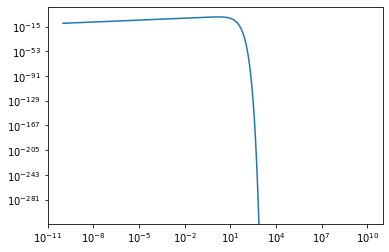

Input 0.0001 	Output 9.999500008333333096e-05
Input 1.0 	Output 0.58197670686932642437
Input 10000.0 	Output 1.1354838653147360985e-4343


In [86]:
#array of x values from 1e-10 to 1e10 in log space, using the correct dtype
x = numpy.logspace(-10,10,1000,dtype=numpy.float128)

#reformulated power_integral function to work with arrays or numbers, avoiding overflow
def power_integral(x):
    #if we have a list, convert to numpy array
    if(type(x) == list):
        x = numpy.ndarray(dtype=numpy.float128)
        
    #if we have a numpy array, proceed
    if(type(x) == numpy.ndarray):
        retvals=numpy.zeros_like(x,dtype=numpy.float128)
        inds=x < 1e3
        #small values can be directly calculated
        retvals[inds] = x[inds]**2/(numpy.exp(x[inds])-1.0)
        #in the limit of large x, f(x)~exp(-x)
        retvals[~inds] = numpy.exp(-x[~inds])
        return retvals
    #we assume we have a number
    else:
        if(type(x)!='float128'):
            x=numpy.float128(x)
        if(x > 1e3):
            return numpy.exp(-x)
        else:
            return x**2/(numpy.exp(x)-1.0)

y=power_integral(x)
loglog(x,y) 
print("Minimum Value Calculated:",min(y[y>0]))
show()

for xval in [1e-4,1e0,1e4]:
    print("Input",xval,"\tOutput",power_integral(xval))